In [1]:
from problem import * # the code that largely constitutes these experiments.
#from bokeh.io import output_notebook
%matplotlib inline
#output_notebook()
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This statistical investigation takes a look at how people use wikipedia. Wikipedia makes available stats on how people come across wikipedia page, be it through a link from a google search or a link on another wikipedia page etc. This type of information is sometimes called a 'clickstream', and the next cell shows how this is manifested in a SQL database.  The exhuastive list of so-called 'referers' is:
- google, called 'other-google' in the table.
- bing, called 'other-bing' in the table
- yahoo, called 'other-yahoo' in the table
- wikipedia's own search feature, called 'other-wikipedia'
- other wikipedia pages. This information is not aggregated; each page which links to the 'current' page has its own count.
- other. 

The raw data for this notebook counts wikipedia traffic from February 2015. The sources of this data are hosted [on datahub](http://datahub.io/dataset/wikipedia-clickstream). The website there makes clear some of the finer points involved in the data collection, but I'll summarize the most relevant ones here:

In [5]:
conn = psycopg2.connect(dbname="wiki", user="shalom", host="localhost", password="")
pd.read_sql("SELECT * FROM wikithresh LIMIT 20",conn)

,referer_id,id,n,referer,title,type
0,235562,63564,12,Fatigue_(medical),Hematology,other
1,2015084,63564,15,Habiba_Sarobi,Hematology,link
2,9818989,63564,15,Eric_Schoomaker,Hematology,other
3,54176,63564,10,Human_body,Hematology,link
4,1608446,63564,11,Gemcitabine,Hematology,other
5,3335116,63564,10,Human_iron_metabolism,Hematology,other
6,436059,63564,92,Hematocrit,Hematology,link
7,215791,63564,62,Erythrocyte_sedimentation_rate,Hematology,link
8,4649852,63564,17,Hijama,Hematology,link
9,140432,63564,14,Hepatology,Hematology,link


This information lends itself to many sorts of statistical investigations. The type of questions I'm interested in here are "which categories of wikipedia pages have characteristic access patterns?" A distinct usage pattern might mean:

- a noteworthy proportion of traffic from within wikipedia compared to traffic from search engines.
- a noteworthy distribution of which search engines people 
- a correlation between some statistic of a category and that of another category

Because I'm interested in proportions like this, wikipedia pages without many views would provide prohibitively much noise. For instance, there are many pages like ' ' which have only been visited via ' ', and that does not point to interesting results so much as the coincidence of a few people happening to have done ' '. The exact choice of cutoff is. This number was not decided through any interesting, rigorous way. In fact, my first inclination was to made that threshold a parameter to queries by making a tresholded SQL view. It turns out the queries here are massively sped up by storing an index on 'title', and such bookeeping requires tables which are not dynamically formed.

In order to have a feel for what is 'noteworthy', it is useful to look at some basic descriptive statistics on the data we're working with:

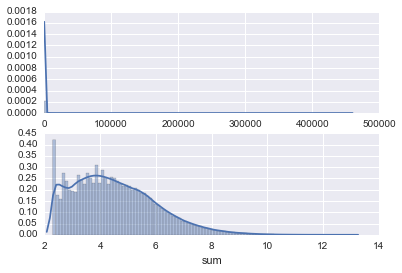

Preparing problem instance.
Filling tables with query results
       prop-wikipedia  prop-twitter  prop-bing  prop-google  prop-facebook  \
count       20.000000     20.000000  20.000000    20.000000      20.000000   
mean         0.121953      0.003512   0.046800     0.795578       0.000491   
std          0.127406      0.006569   0.043386     0.113842       0.001215   
min          0.024096      0.000000   0.000000     0.557971       0.000000   
25%          0.045910      0.000000   0.000000     0.744078       0.000000   
50%          0.066547      0.000000   0.036707     0.828946       0.000000   
75%          0.121775      0.003026   0.074699     0.863720       0.000000   
max          0.442029      0.024096   0.154980     0.961696       0.004004   

       engines/links  prop-yahoo  
count      20.000000   20.000000  
mean        0.520429    0.031666  
std         0.194064    0.036450  
min         0.138220    0.000000  
25%         0.387359    0.000000  
50%         0.501164    0

In [2]:
data_characteristics()

Let's first examine the question 'do people use the microsoft bing search engine notably often to look at microsoft-related wikipedia pages?' I would expect so, because 1) people who use microsoft products may be most likely to be reading about microsoft products and 2) microsoft makes bing the default search engine on microsoft stuff, and many people tend not to switch away from defaults.

In [6]:
import instances.ms
ms_problem = WikiProblem(instances.ms.inst)

Preparing problem instance.
Azure_Services_Platform does not exist
Http does not exist
United_Fruit does not exist
Filling tables with query results


These graphs, called violinplots, are 

microsoft
       prop-wikipedia  prop-twitter  prop-bing  prop-google  prop-facebook  \
count       32.000000     32.000000  32.000000    32.000000      32.000000   
mean         0.058890      0.009051   0.067697     0.827347       0.000291   
std          0.020339      0.015797   0.046878     0.097164       0.000318   
min          0.028635      0.000000   0.028982     0.512219       0.000000   
25%          0.045861      0.003075   0.043697     0.829202       0.000000   
50%          0.057453      0.004209   0.052713     0.853965       0.000292   
75%          0.073582      0.006548   0.065138     0.881026       0.000455   
max          0.107089      0.070858   0.252803     0.909432       0.001206   

       engines/links  prop-yahoo  
count      32.000000   32.000000  
mean        0.618908    0.036725  
std         0.110578    0.055554  
min         0.397405    0.000000  
25%         0.532843    0.014081  
50%         0.628506    0.019470  
75%         0.715582    0.030454  
max    

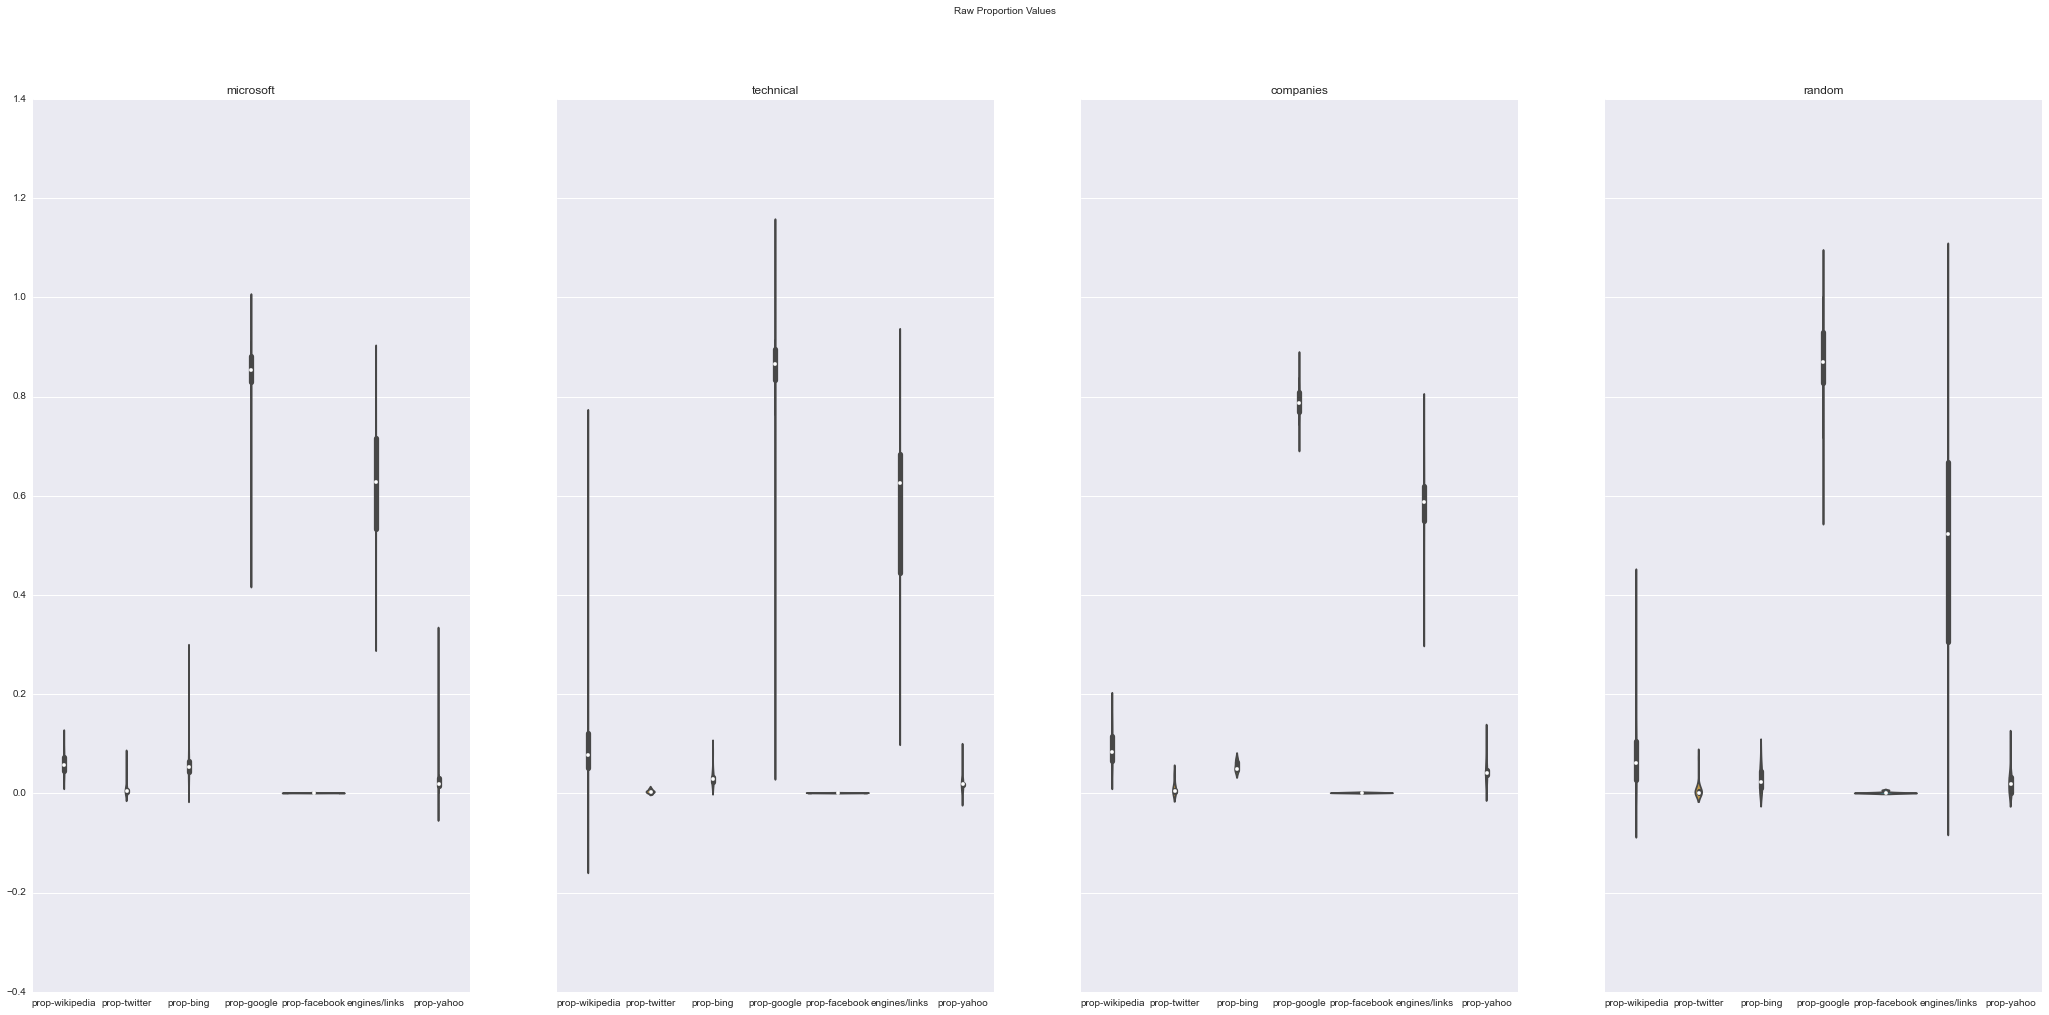

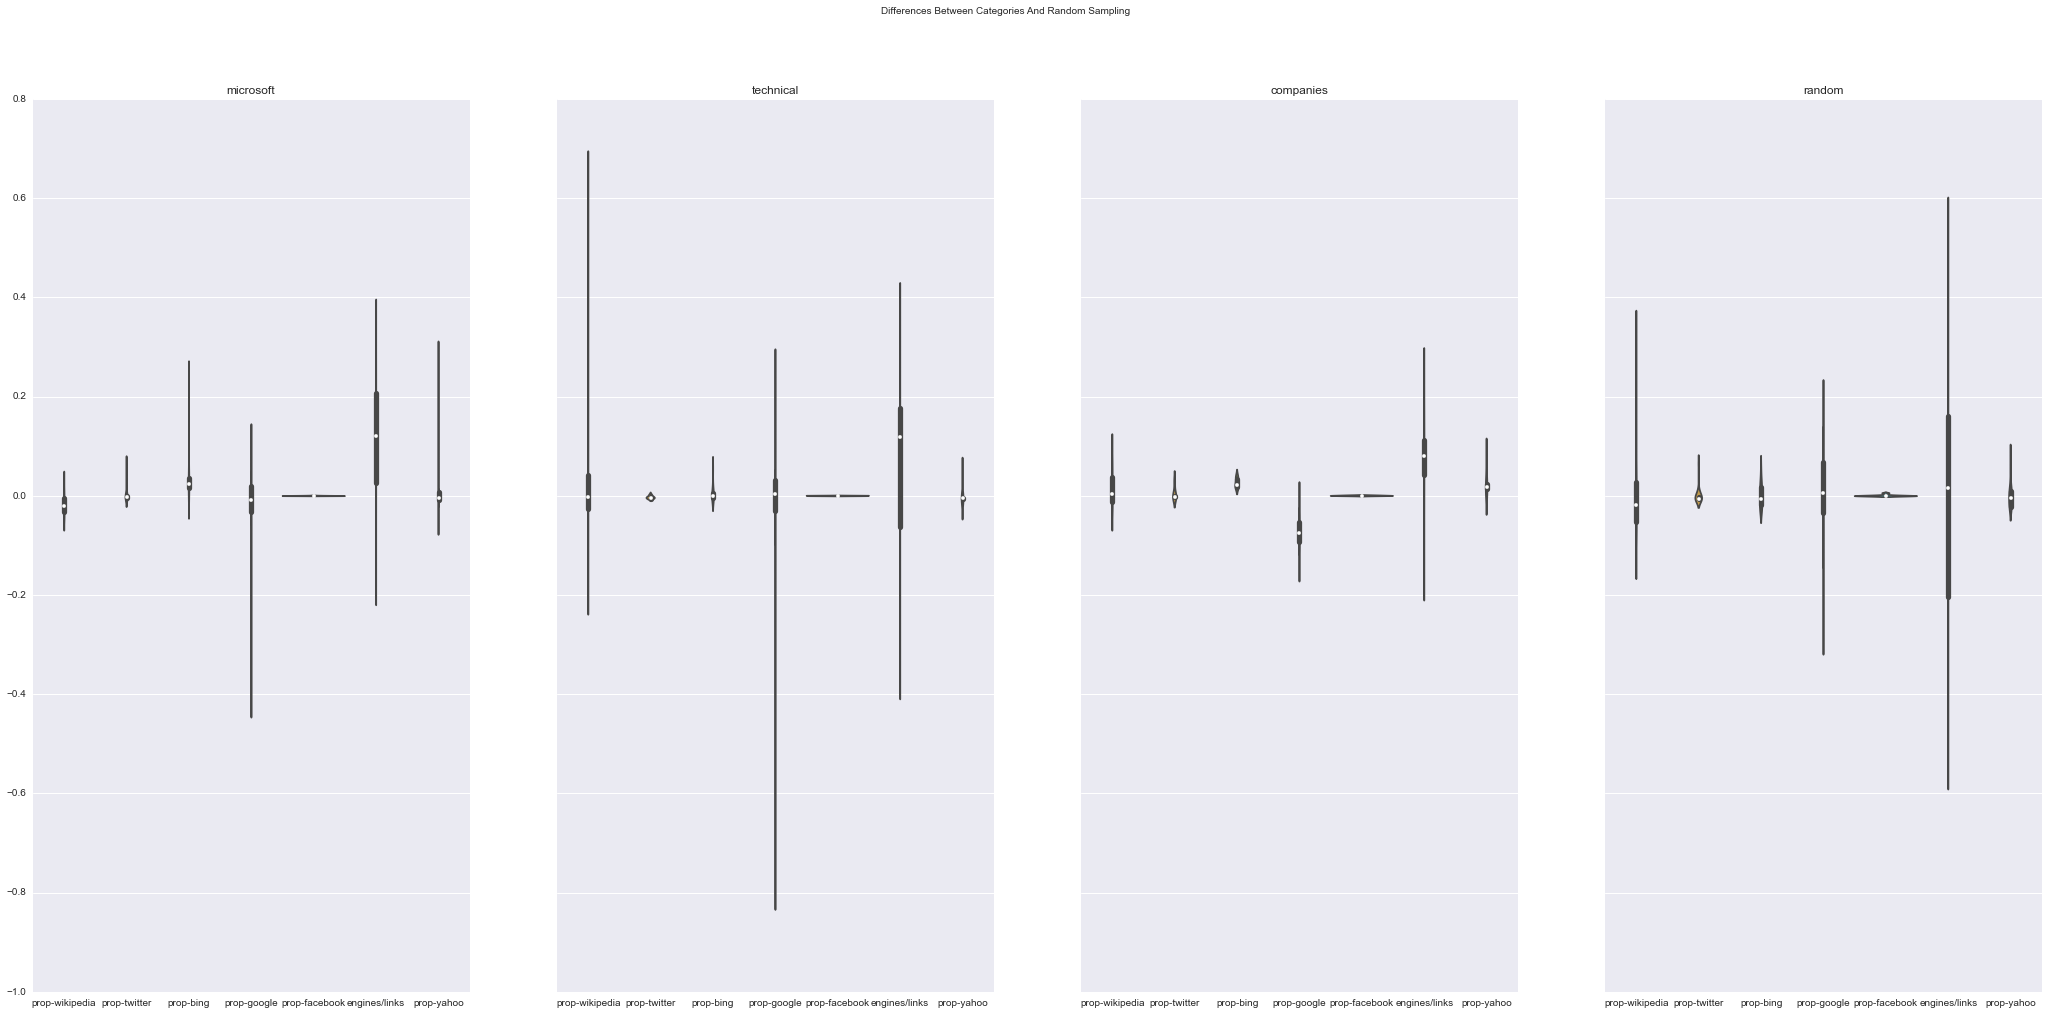

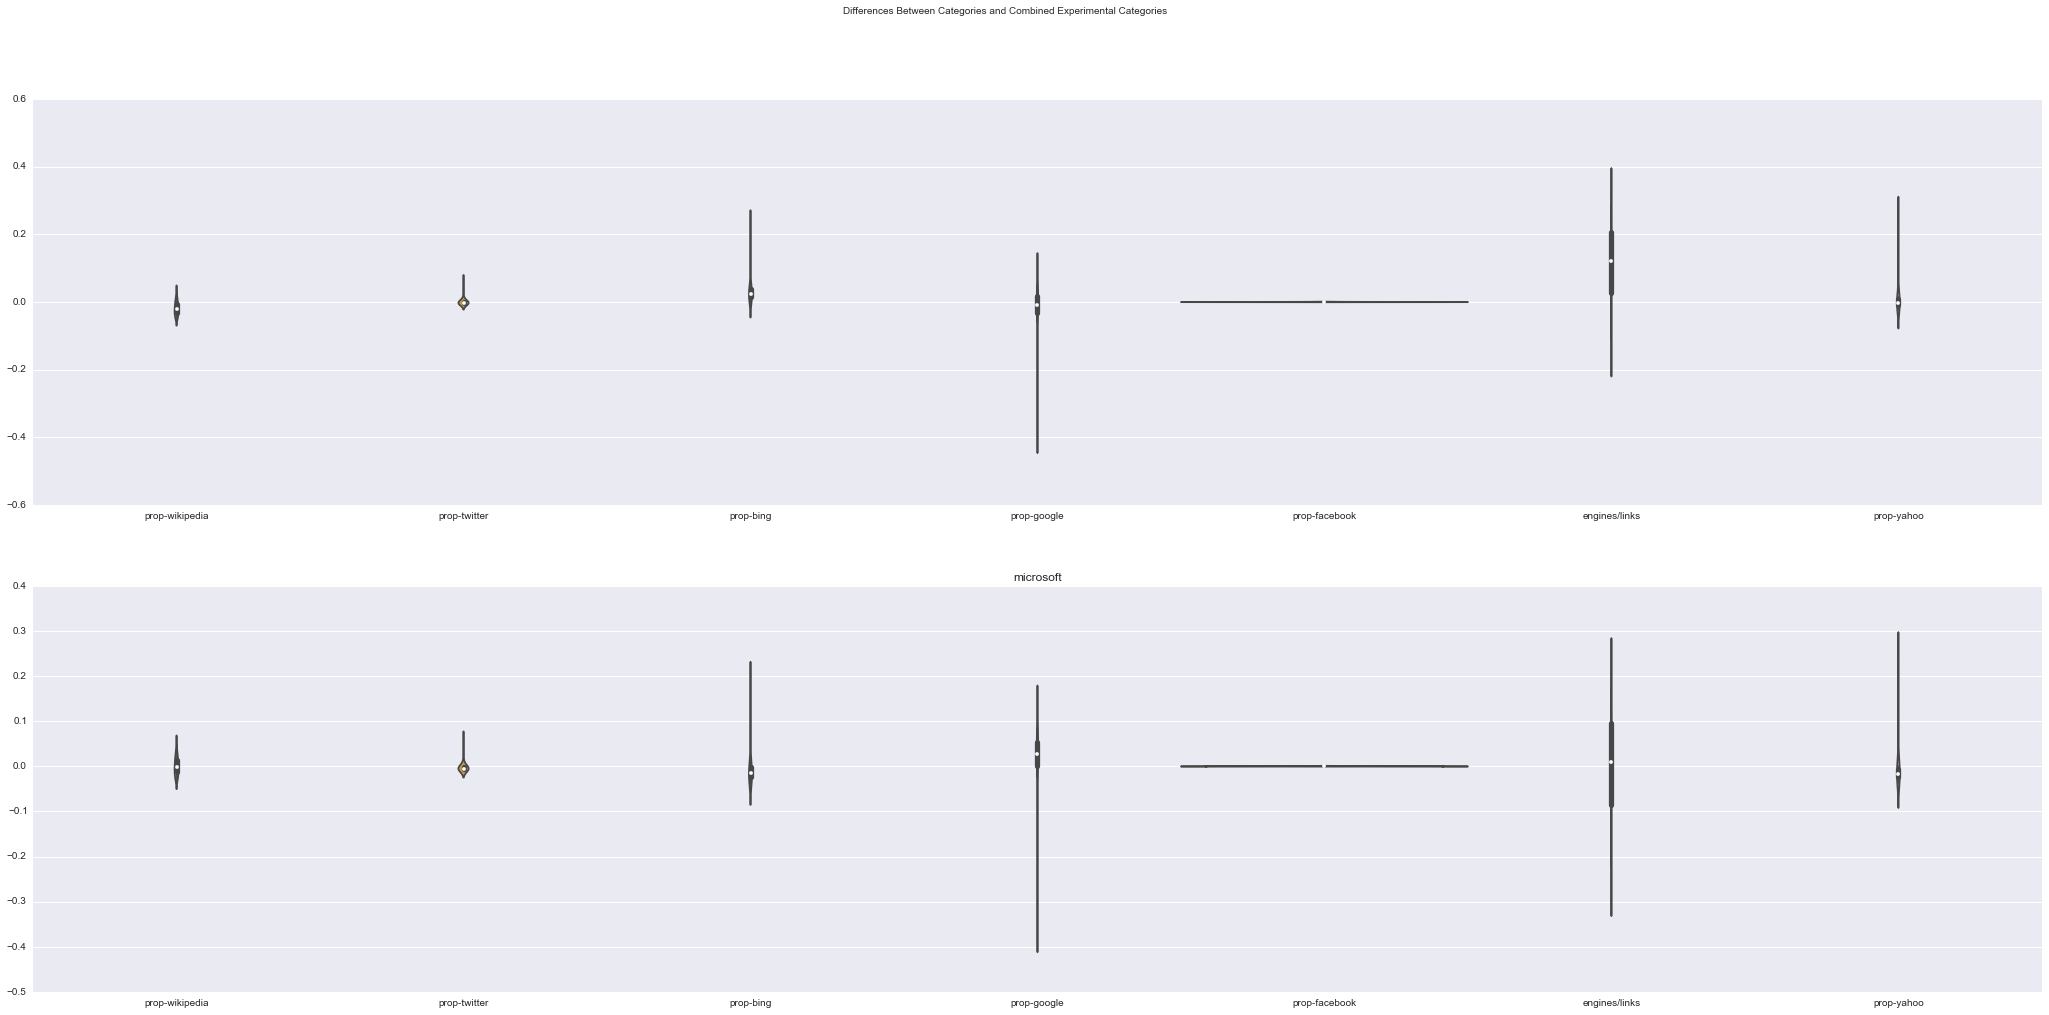

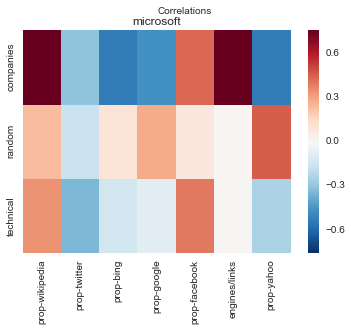

In [4]:
ms_problem.discovery()

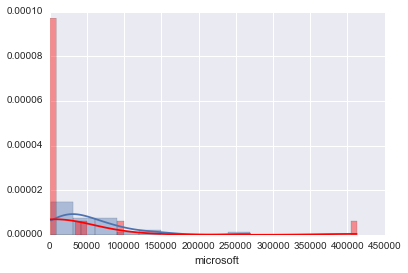

In [7]:
ms_problem.popularityOf()

It seems _. 

There is a word 'clickbait' that people use to talk about provocativly titled stuff that people click on. Here, we consider the categories 'sex', 'drugs', 'danger', and 'politics' as potentially clickbait. Let's look at what the numbers say.

In [5]:
import instances.clickbait
clickbait_problem = WikiProblem(instances.clickbait.inst)

Preparing problem instance.
Gonorrhea does not exist
Anthrax#Gastrointestinal does not exist
Syphillis does not exist
Terrorist_attack does not exist
Anthrax#Pulmonary does not exist
AIDS does not exist
Drowning#Capital_punishment does not exist
Congressional_Hispanic_Conference does not exist
Legalization_of_drugs does not exist
Gay_marriage does not exist
Marriage_Protection_Act does not exist
Conservatism_in_the_United_StatesNational_Association_for_the_Advancement_of_Colored_People does not exist
Workers%27_compensation does not exist
Federalism#United_States does not exist
Islamic_State_of_Iraq_and_the_LevantLeft-wing_politics does not exist
Arab-Israeli_conflict does not exist
Pro-life does not exist
Pledge_Protection_Act does not exist
LSD does not exist
Viagra does not exist
Xanax does not exist
White_Widow_(cannabis) does not exist
Marijuana does not exist
Heroine does not exist
Cannabis_(drug)#Skunk does not exist
homosexuality does not exist
Sexual_network does not exist
het

danger
       prop-wikipedia  prop-twitter  prop-bing  prop-google  prop-facebook  \
count       58.000000     58.000000  58.000000    58.000000      58.000000   
mean         0.064142      0.005645   0.054944     0.839305       0.001054   
std          0.029448      0.015180   0.016221     0.035465       0.002278   
min          0.021326      0.000000   0.024106     0.762031       0.000000   
25%          0.042968      0.001369   0.044911     0.818022       0.000000   
50%          0.057527      0.002236   0.052463     0.845498       0.000487   
75%          0.076062      0.003885   0.066879     0.861727       0.000840   
max          0.147017      0.113733   0.095512     0.917931       0.013570   

       engines/links  prop-yahoo  
count      58.000000   58.000000  
mean        0.613547    0.034910  
std         0.125154    0.010797  
min         0.230088    0.020597  
25%         0.564525    0.027224  
50%         0.621782    0.031855  
75%         0.708286    0.041120  
max       

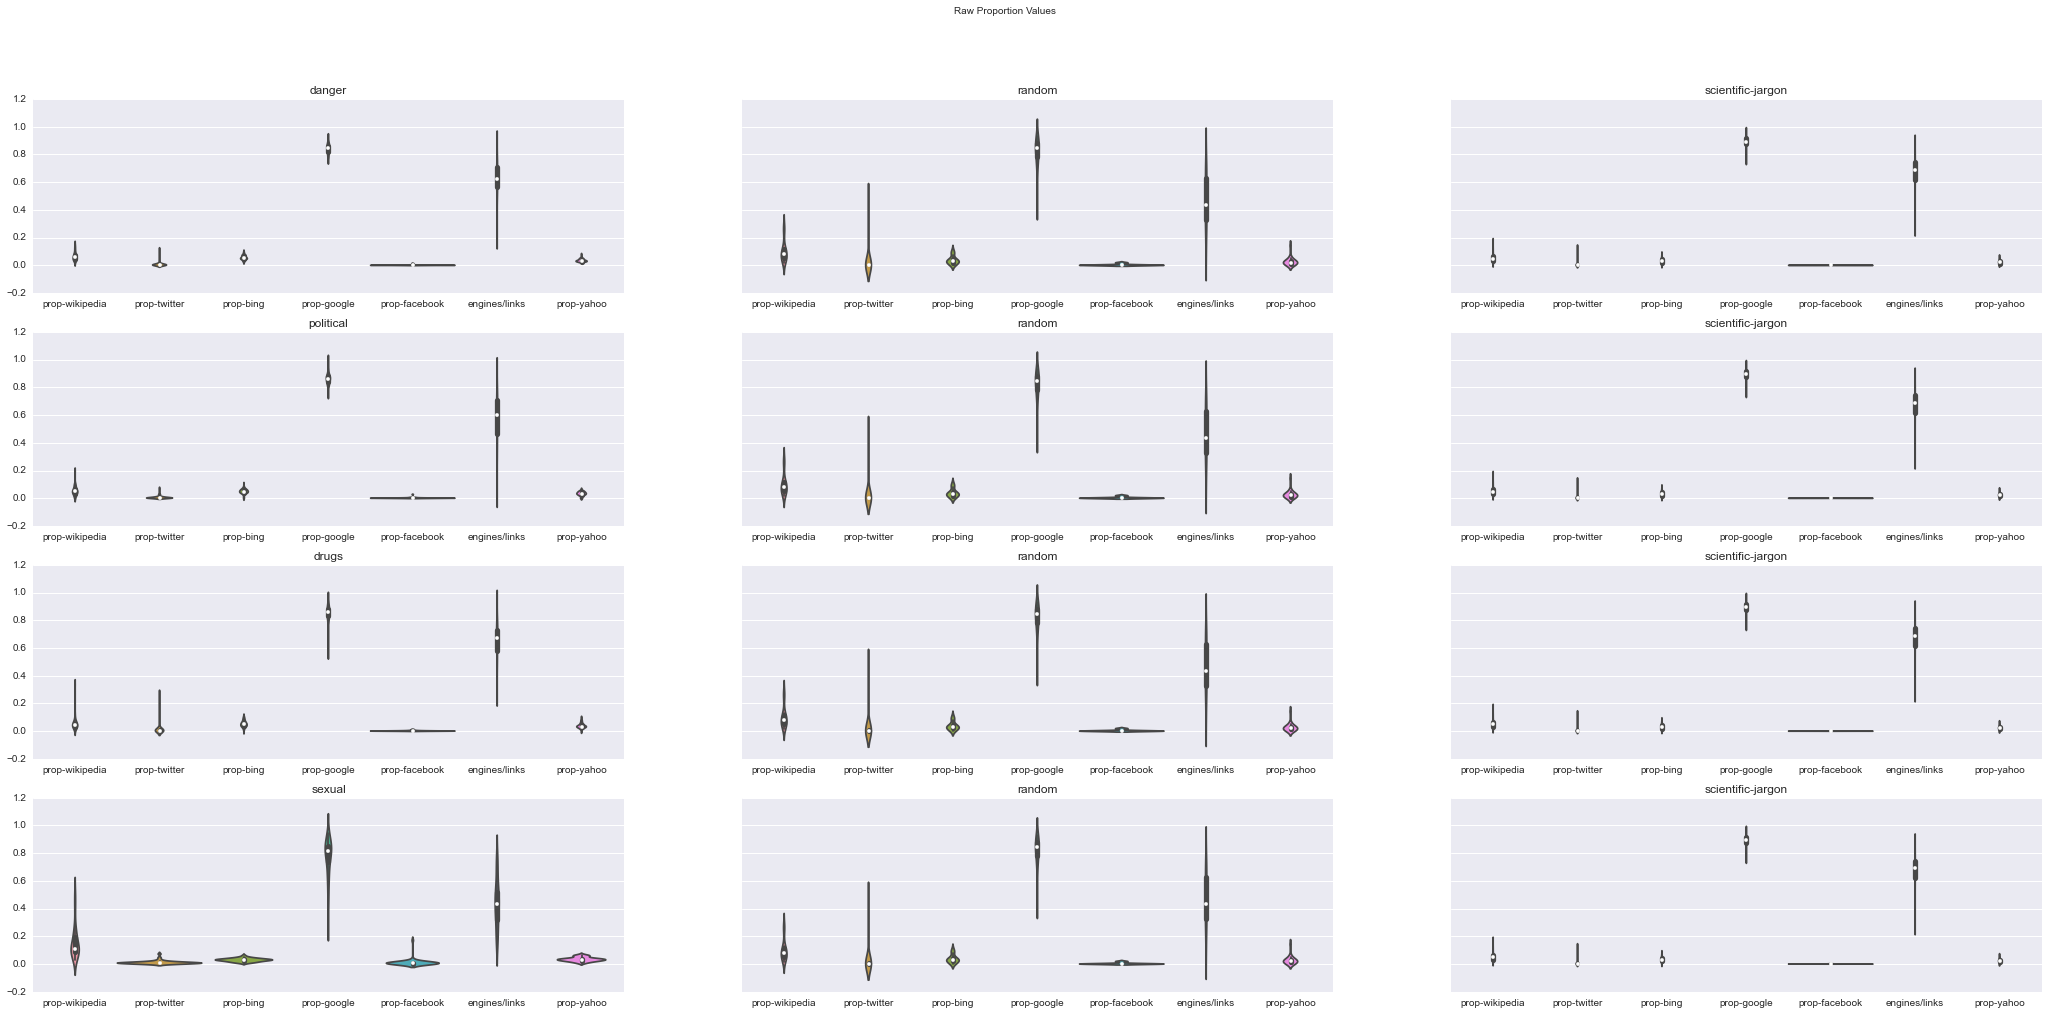

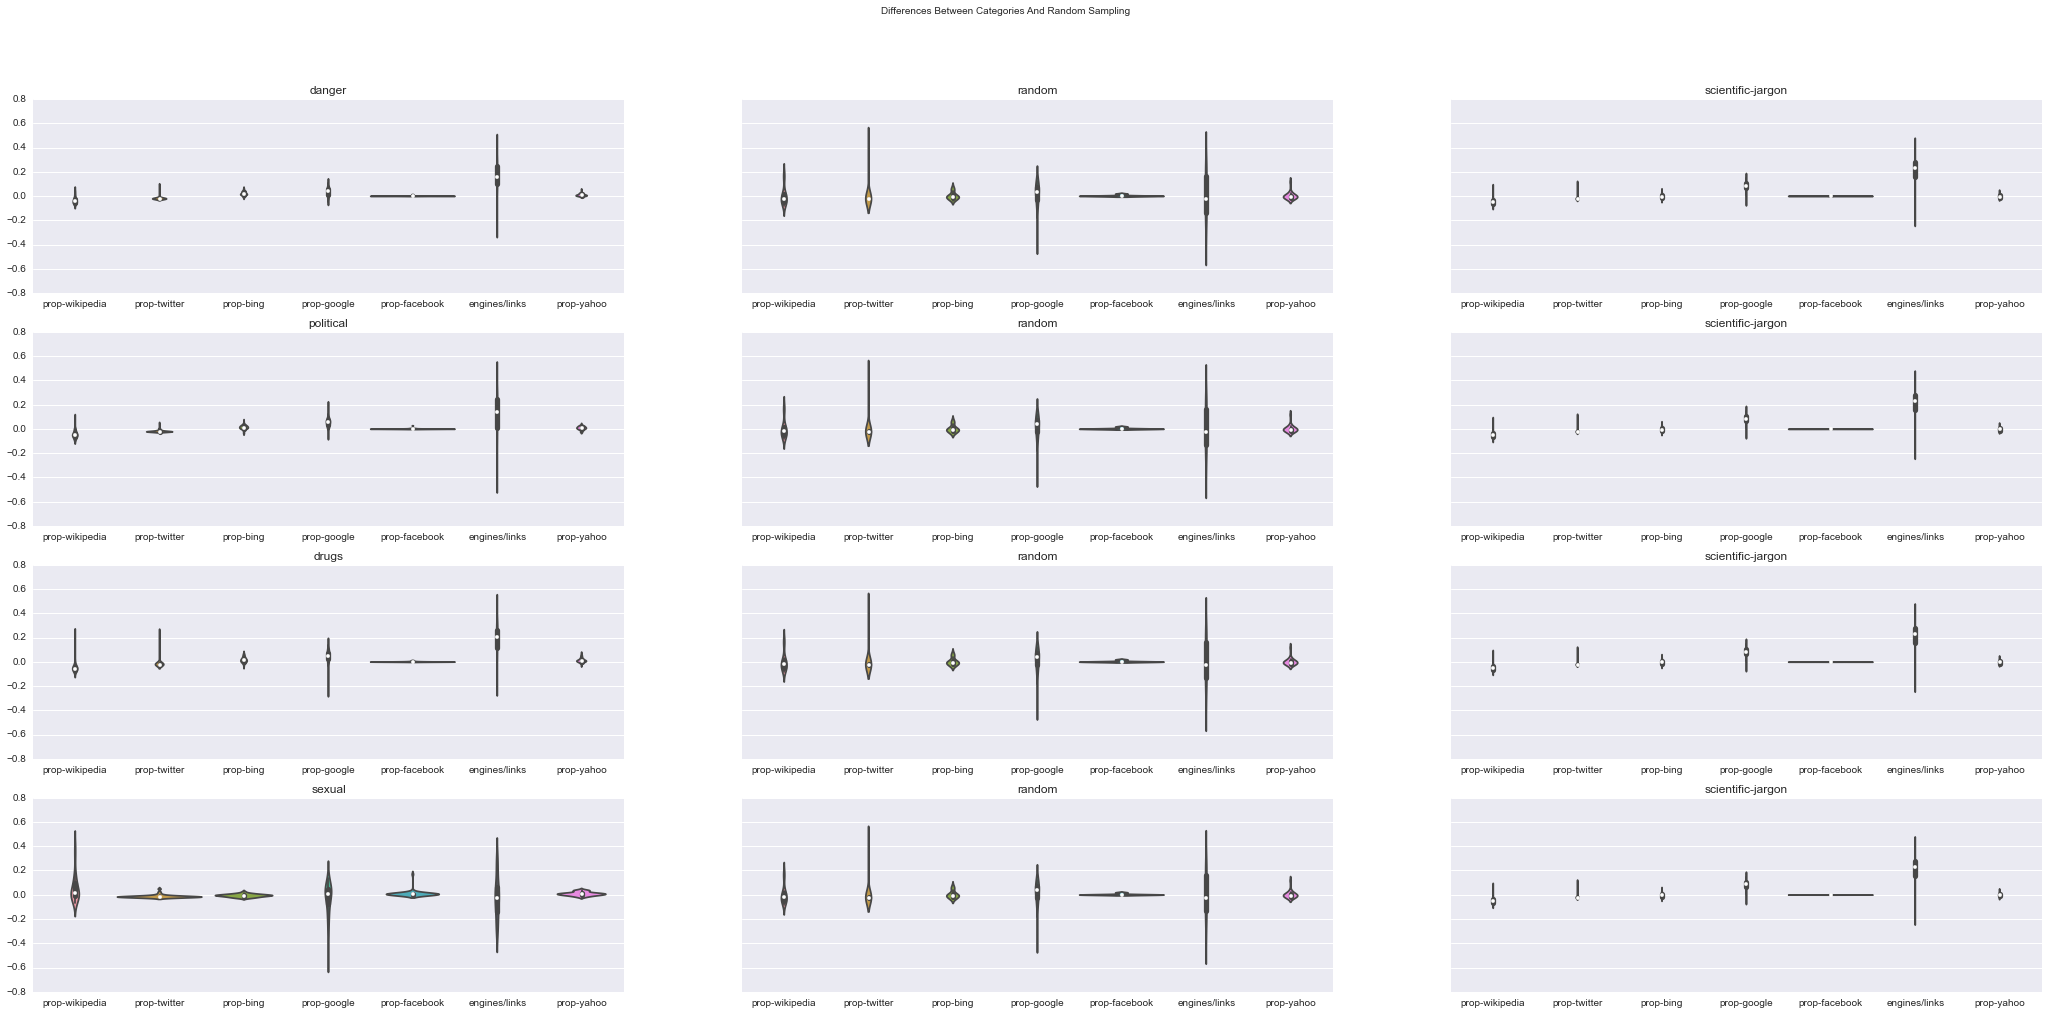

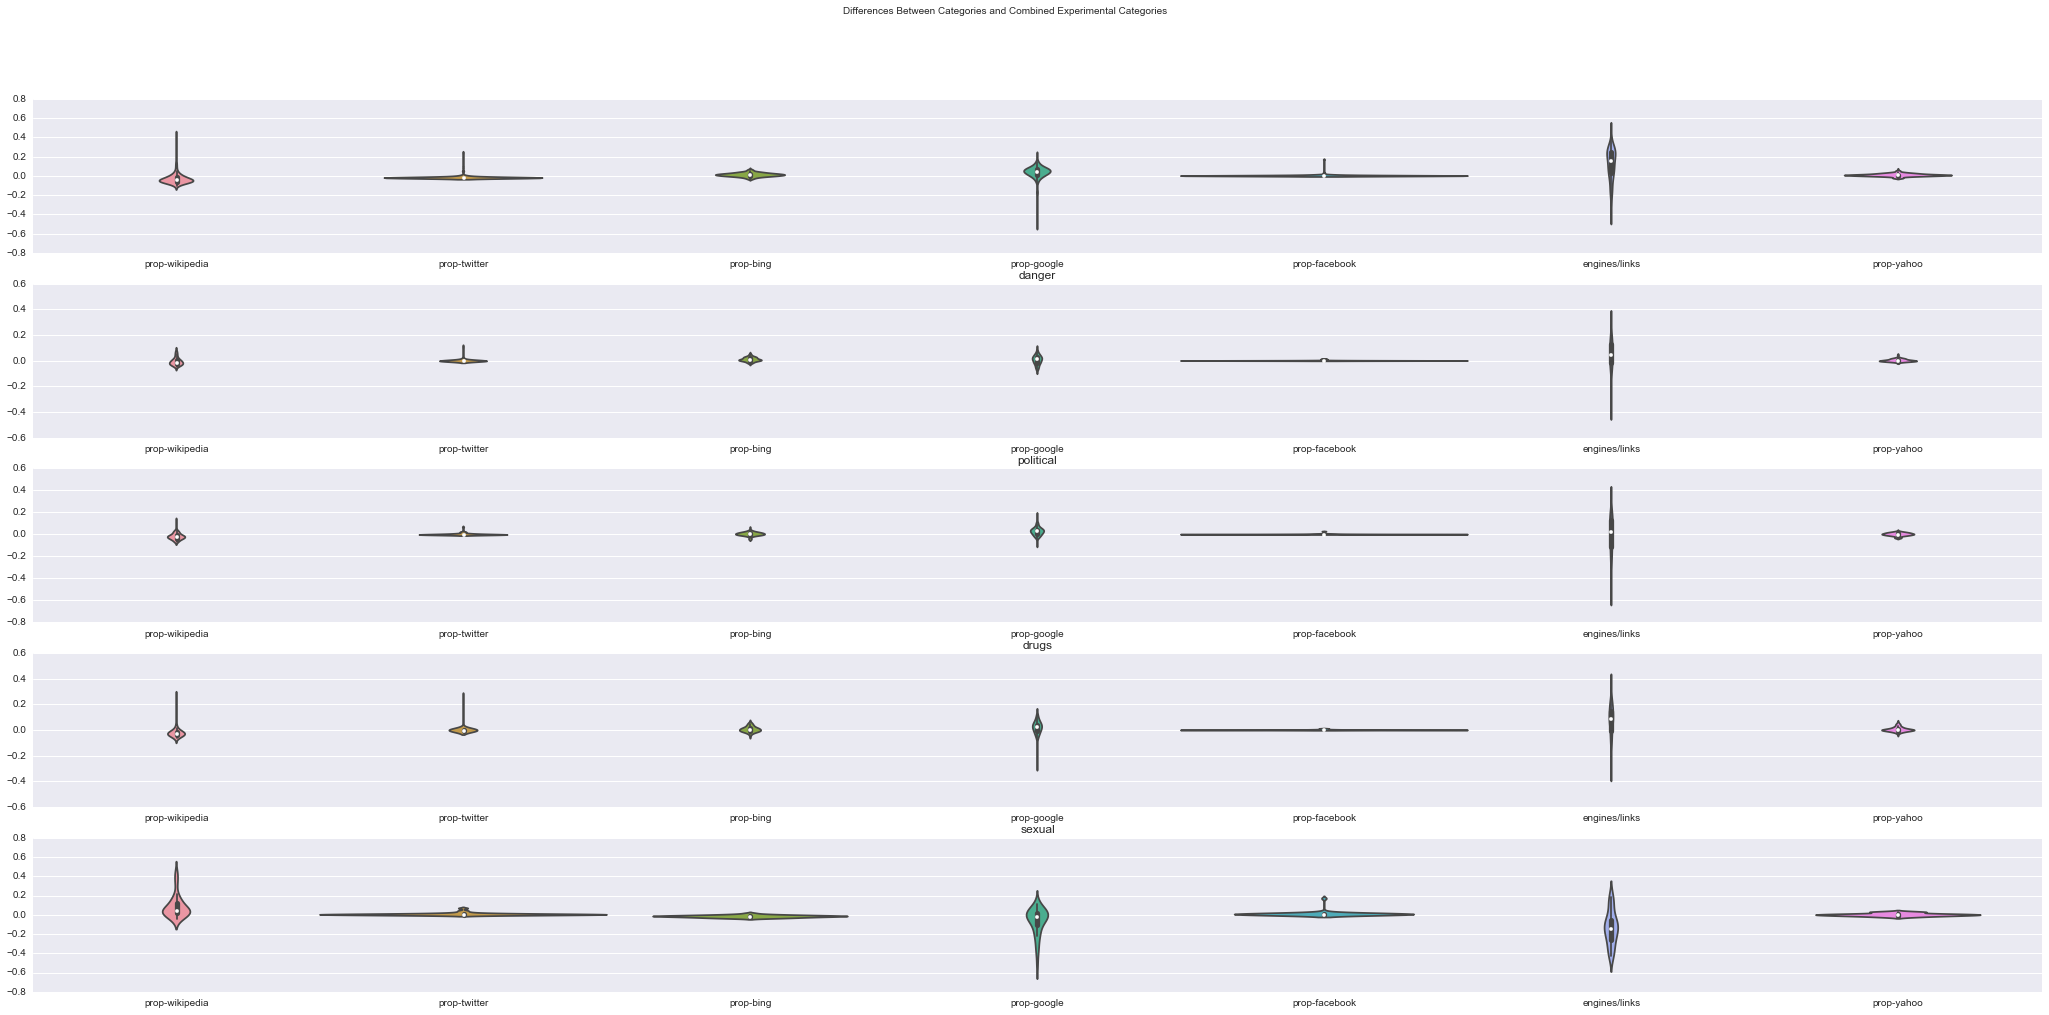

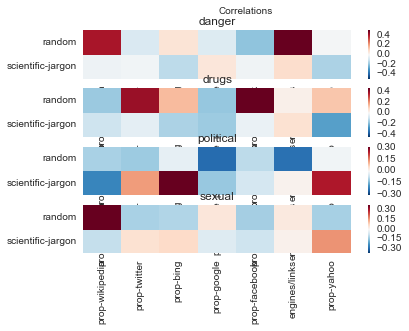

In [6]:
clickbait_problem.discovery()

From looking at these plots, it seems sex is clickbait. Drugs are not clickbait. Danger is not clickbait.

I sometimes find myself reading about a author/artist I'm interested in, and while I'm on that page I click on their discography or filmography or whatever out of curiosity. However, I don't remember ever searching for a list of things done by a person. I wonder whether other people have a similar usage pattern. Let's see.

In [7]:
import instances.hierarchical
hierarchical_problem = WikiProblem(instances.hierarchical.inst)

Preparing problem instance.
Richard_D_James does not exist
Robert_Downey,_Jr. does not exist
Jack_Nicholson_filmographyStephen_King_bibliography does not exist
Richard_D_James_discography does not exist
Filling tables with query results


person
       prop-wikipedia  prop-twitter  prop-bing  prop-google  prop-facebook  \
count       53.000000     53.000000  53.000000    53.000000      53.000000   
mean         0.080568      0.013144   0.048722     0.816577       0.000342   
std          0.042443      0.059240   0.035078     0.113379       0.000906   
min          0.027534      0.000000   0.018886     0.123490       0.000000   
25%          0.065852      0.001088   0.033678     0.814469       0.000000   
50%          0.076259      0.001996   0.042838     0.840158       0.000000   
75%          0.086386      0.003380   0.053759     0.861465       0.000286   
max          0.349616      0.395525   0.267759     0.920804       0.005844   

       engines/links  prop-yahoo  
count      53.000000   53.000000  
mean        0.587350    0.040646  
std         0.110200    0.033323  
min         0.311550    0.013737  
25%         0.511574    0.025005  
50%         0.596633    0.035880  
75%         0.671679    0.044949  
max       

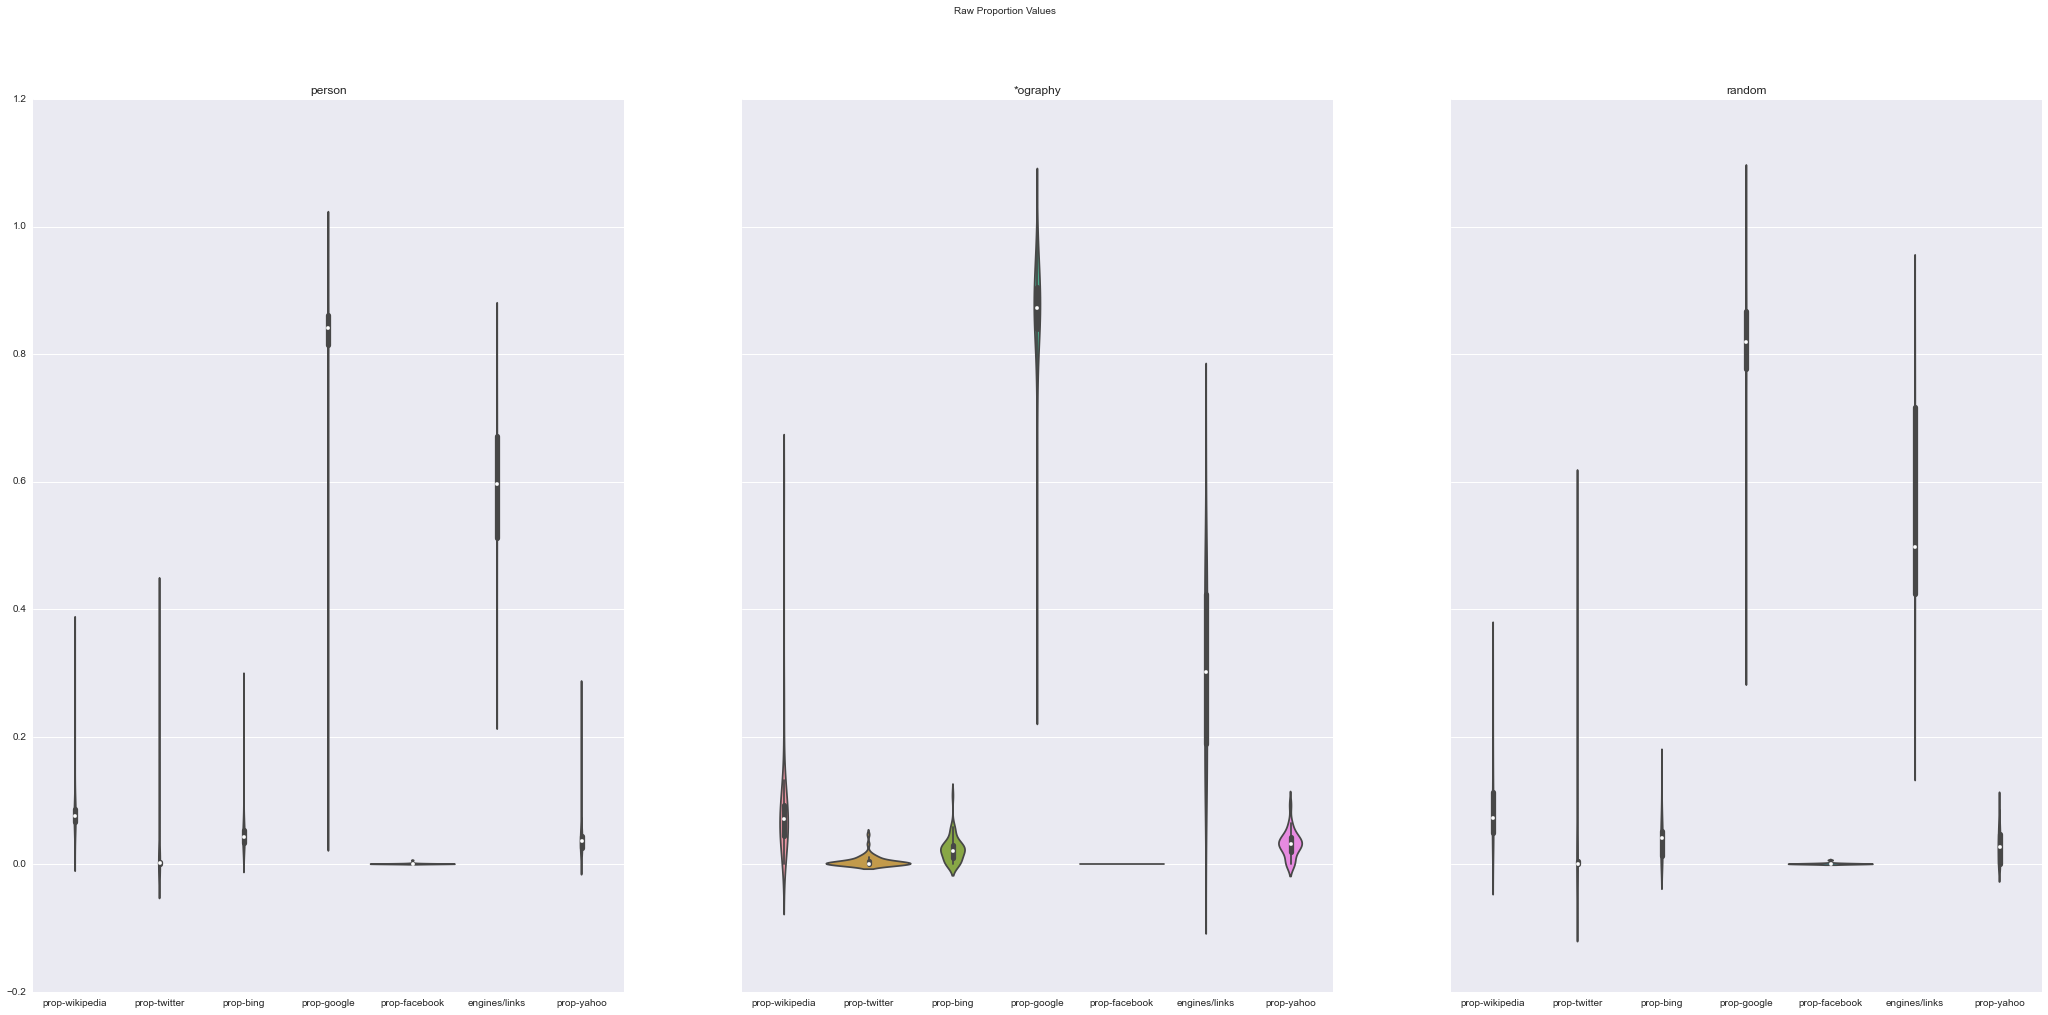

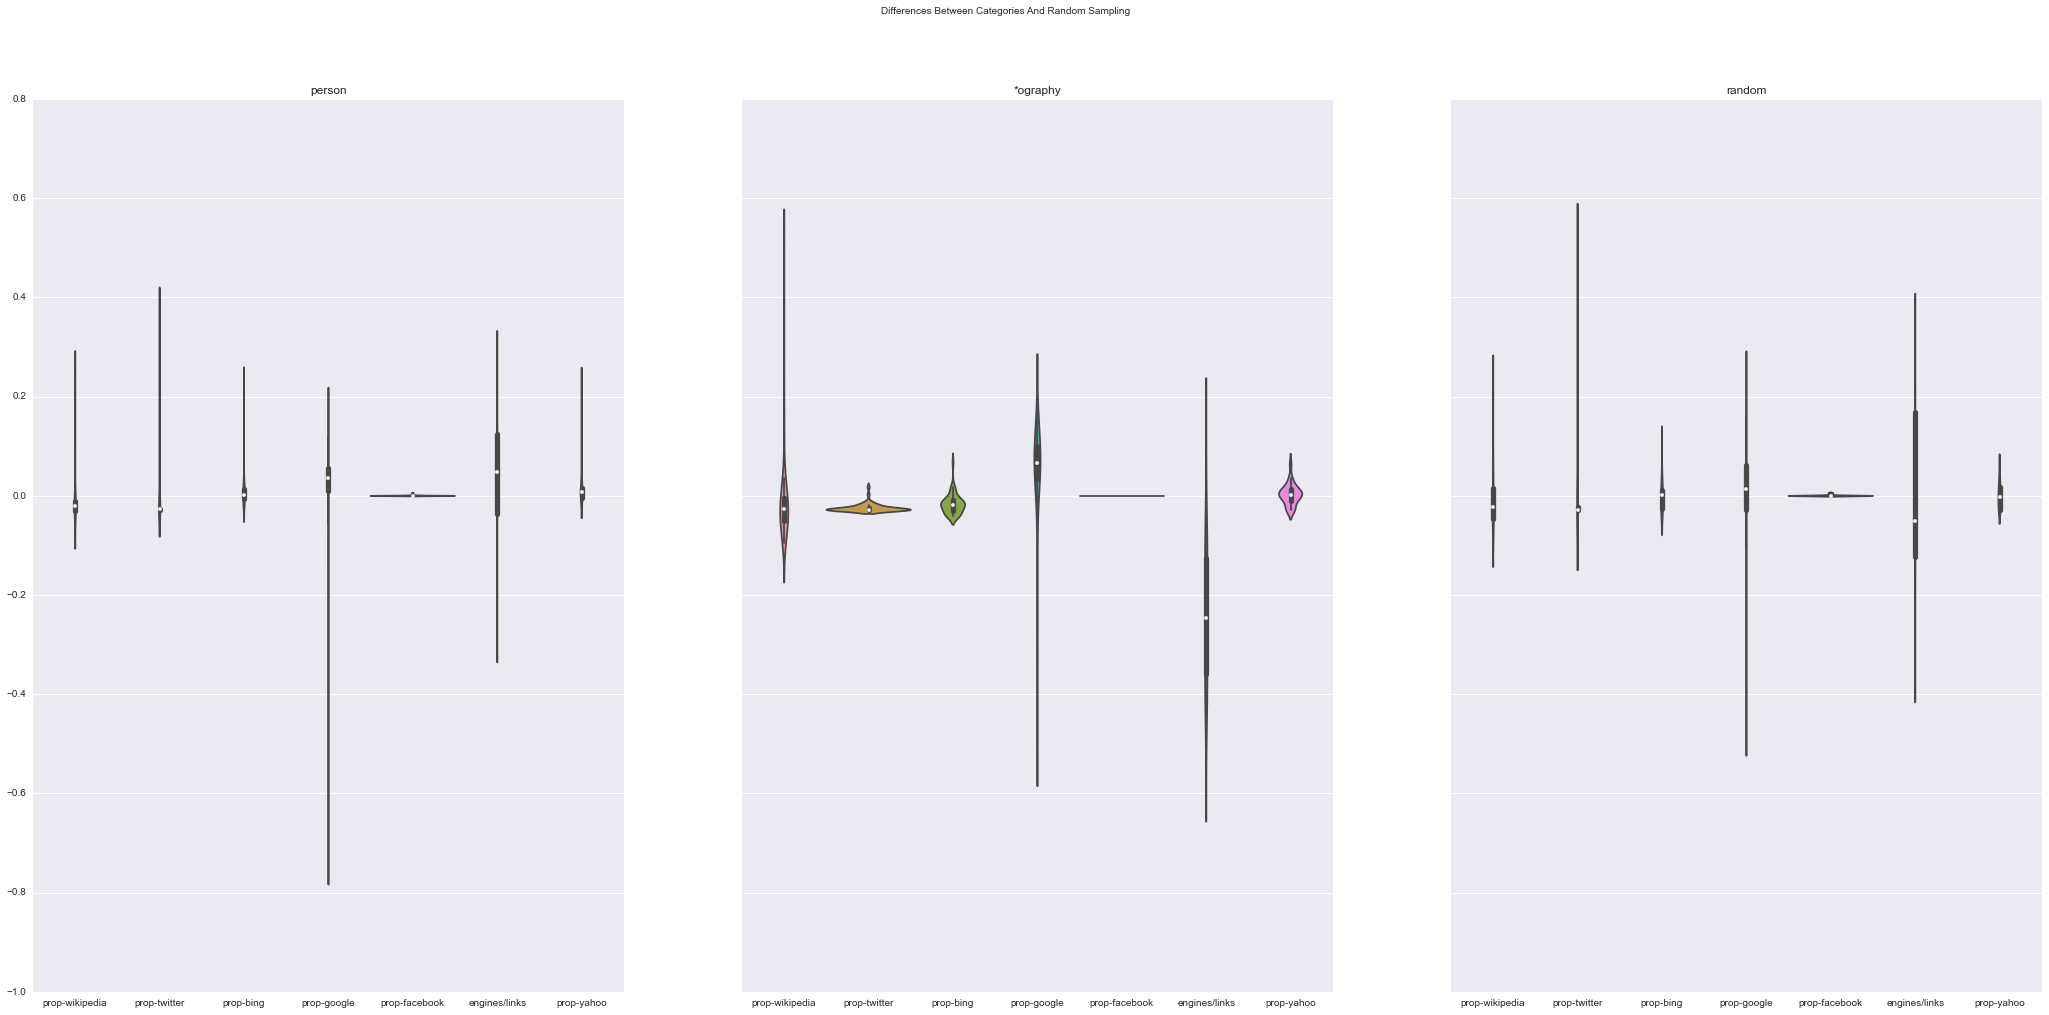

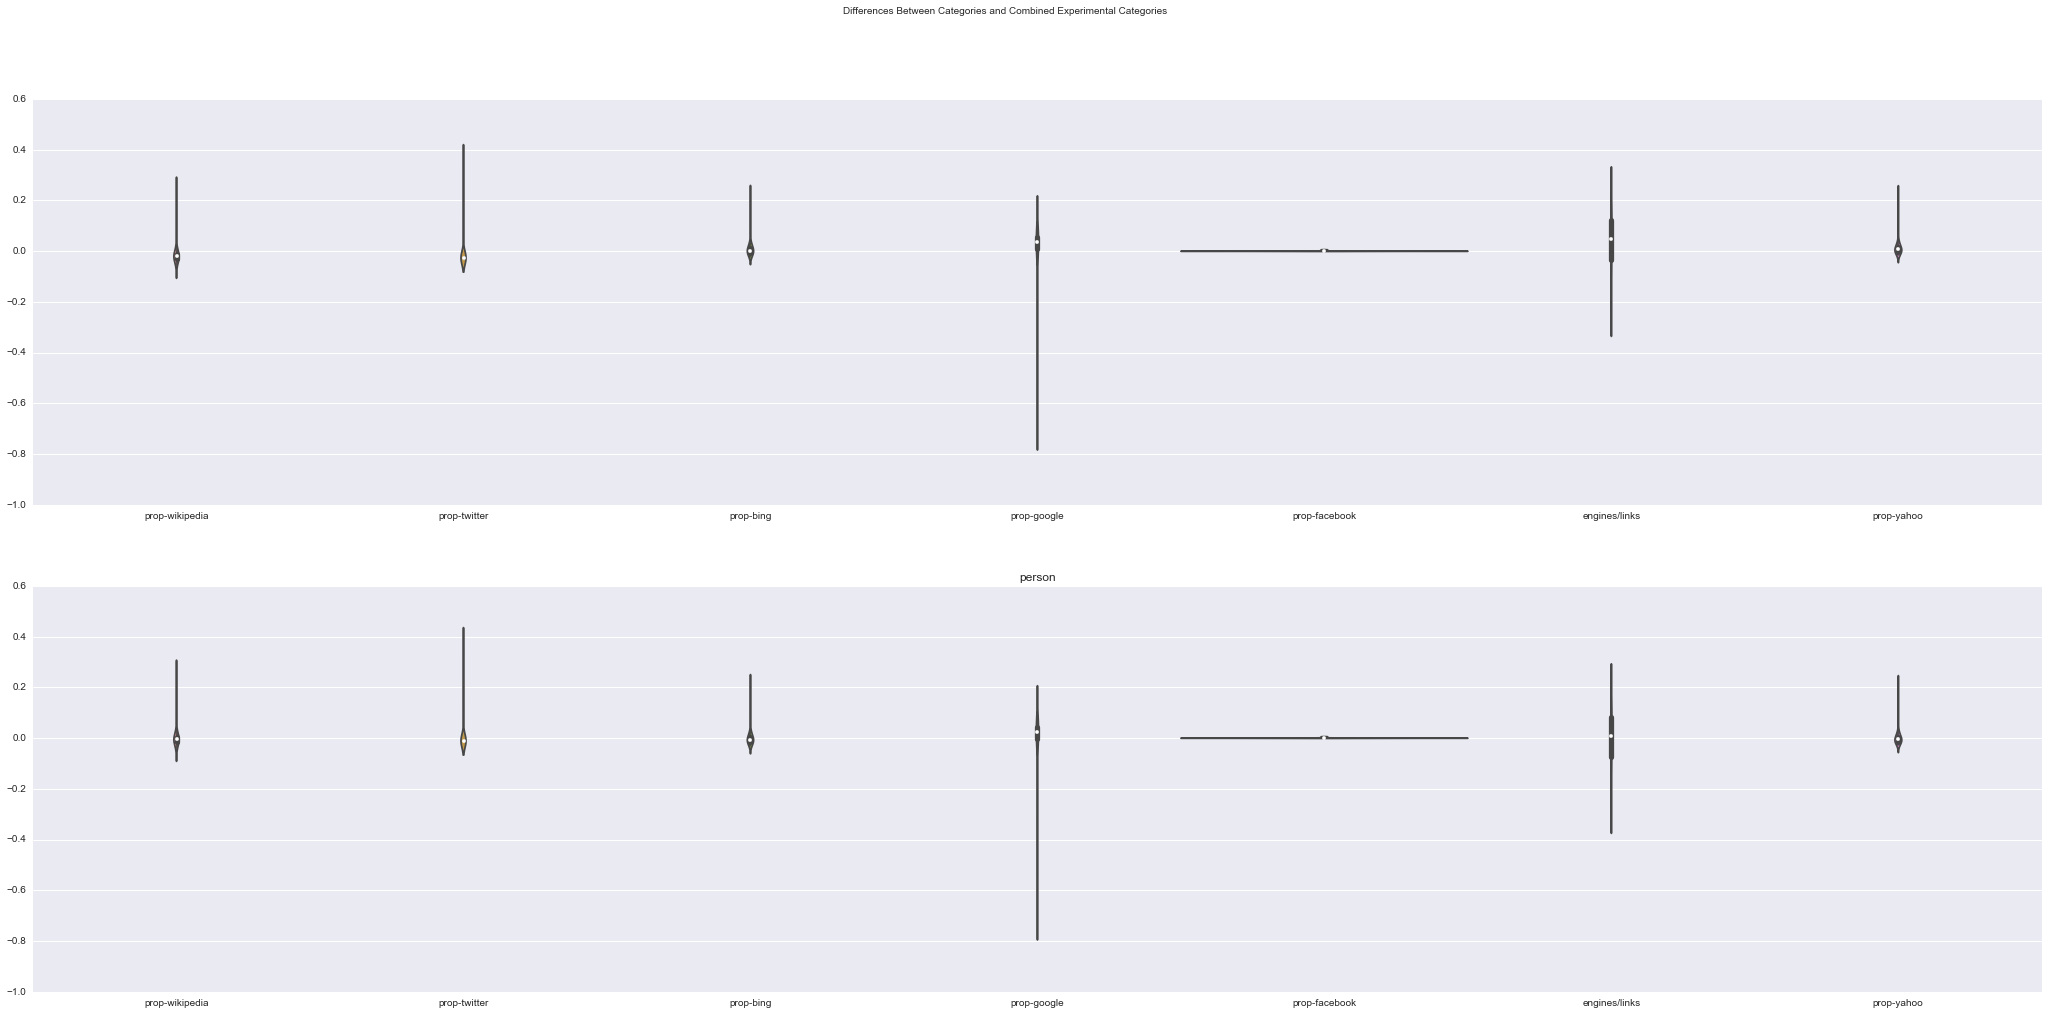

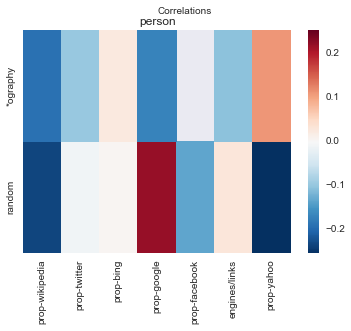

In [8]:
hierarchical_problem.discovery()

I seldom see people post links to wikipedia pages on facebook or twitter. Looking at what people share via social media, or more precisely what people click on via social media, is then more of an unsupervised clustering matter than a hypothesis testing matter.

The source of this data is the work of two people, partly myself and mostly my brother. He has this to say about his methods:

This means that a potentially confounding variable to the idea of inference of these categories compared to random is that these pages are pages a human thought of whereas the random pages were by definition not. What exactly a human, namely mark, thinks of may be influenced by hugely many factors, but the easiest one to test is that he thought of pages that were more popularly viewed than the average page. Let's examine that hypothesis.

Another potential source of bias is in parts of speech. Because it is easy to make samples, here we go...

In [9]:
import instances.nountype
nountype_problem = WikiProblem(instances.nountype.inst)

Preparing problem instance.
world series does not exist
Ideal_Home_Show does not exist
Men%27s_Fashion_Week does not exist
New_Year%27s_Eve does not exist
East_Coast_Surfing_Championships does not exist
French_revolution does not exist
Mercedes-Benz_Fashion_Week_Miami does not exist
alamo does not exist
International_Storytelling_Championship does not exist
stanley cup does not exist
StorySLAM does not exist
New_Year%27s_Day_Parade does not exist
Boston_Early_Music_Festival does not exist
National_Storytelling_Festival does not exist
Columbia Exhibit does not exist
Marvin_Misky does not exist
Hillary_Clinton does not exist
J.K_Rowling does not exist
Martin_Luther King does not exist
Muhammed_Ali does not exist
Gabriel_Garcia Marquez does not exist
Patti_Smith50_cent does not exist
Mao_ZeDong does not exist
Ben_Franklin does not exist
Roman_Pulaski does not exist
Jorge_Louis Borges does not exist
Alexander_The_Great. does not exist
Barak_Obama does not exist
Theramin does not exist
pate

concepts
       prop-wikipedia  prop-twitter  prop-bing  prop-google  prop-facebook  \
count       11.000000     11.000000  11.000000    11.000000      11.000000   
mean         0.051511      0.002596   0.042798     0.872494       0.000750   
std          0.030559      0.004261   0.019455     0.033904       0.001136   
min          0.018595      0.000000   0.009328     0.828423       0.000000   
25%          0.034013      0.000872   0.036465     0.853071       0.000000   
50%          0.039875      0.001274   0.040153     0.856343       0.000251   
75%          0.064947      0.002062   0.052467     0.887893       0.000991   
max          0.125466      0.015201   0.082185     0.949664       0.003734   

       engines/links  prop-yahoo  
count      11.000000   11.000000  
mean        0.721724    0.029851  
std         0.081933    0.012633  
min         0.562361    0.008862  
25%         0.672109    0.023540  
50%         0.695400    0.031795  
75%         0.794661    0.038958  
max     

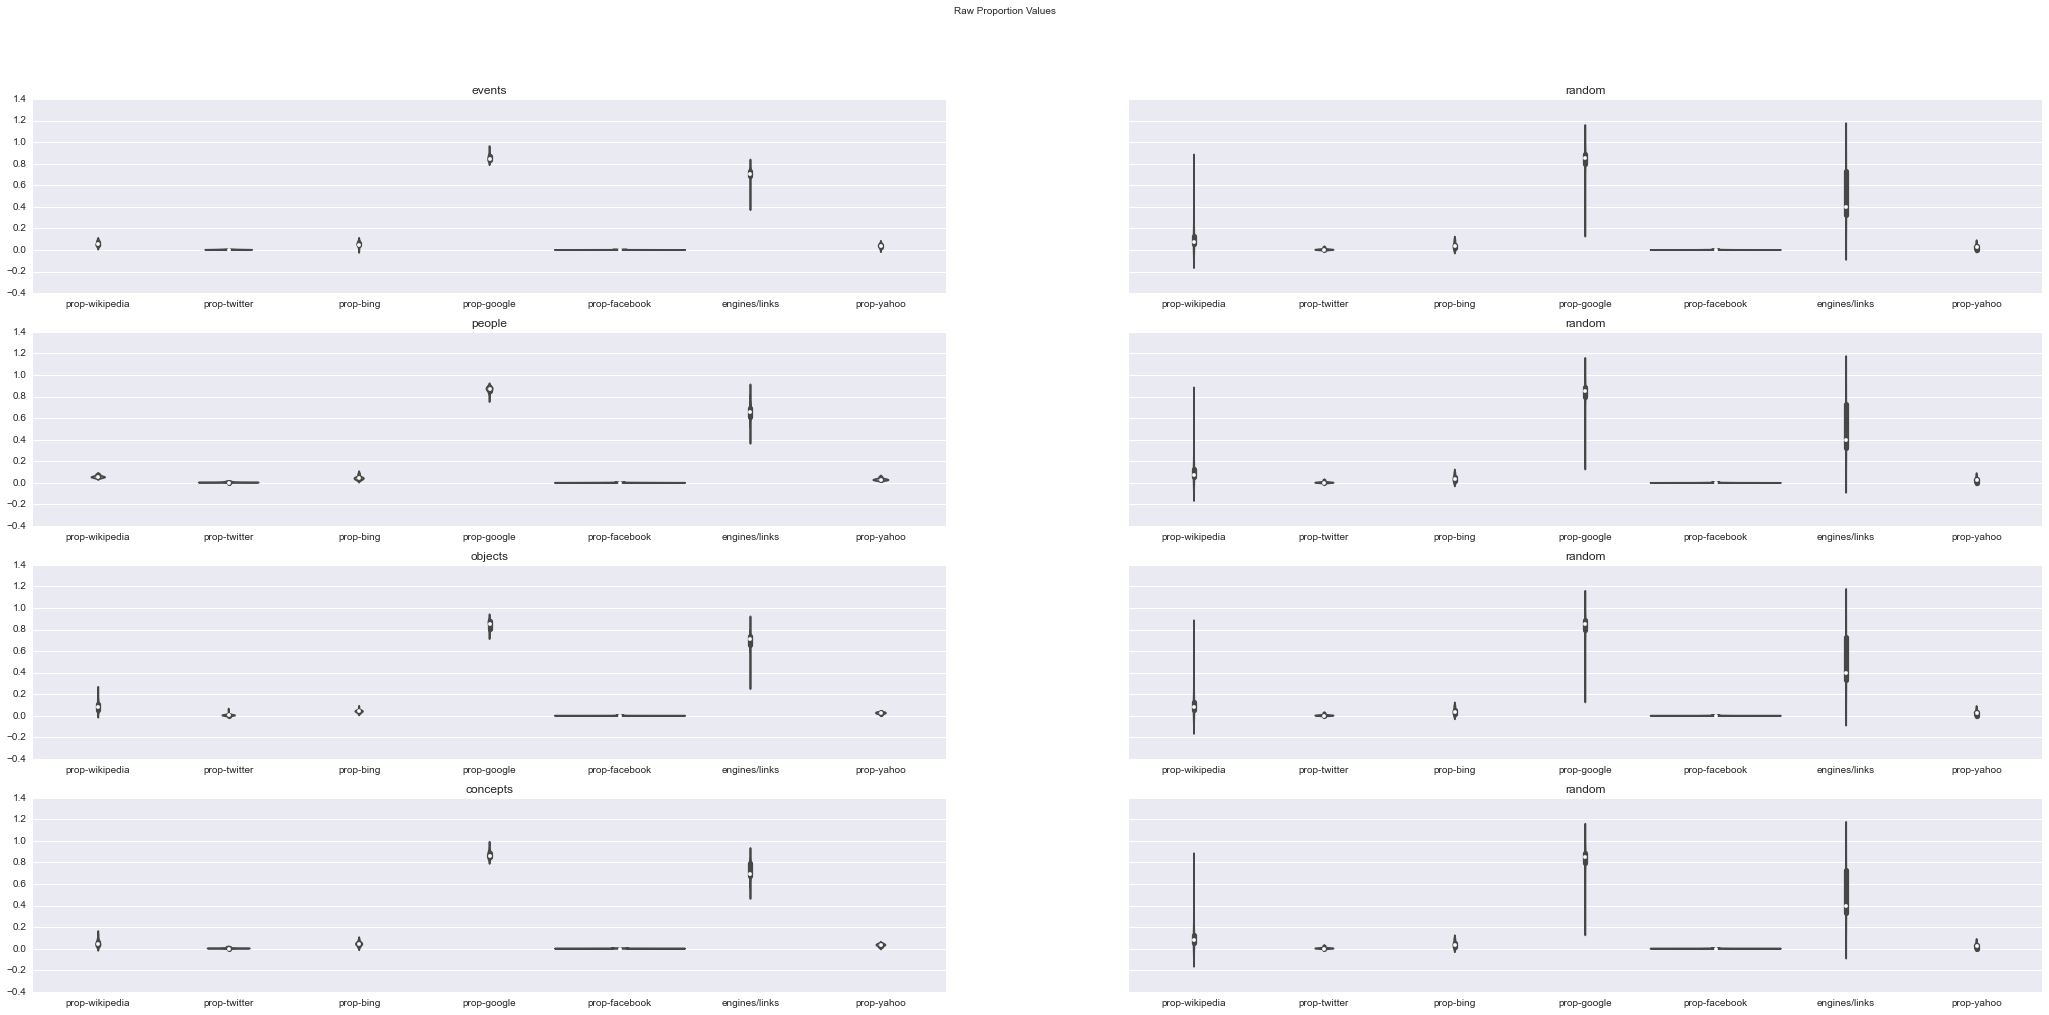

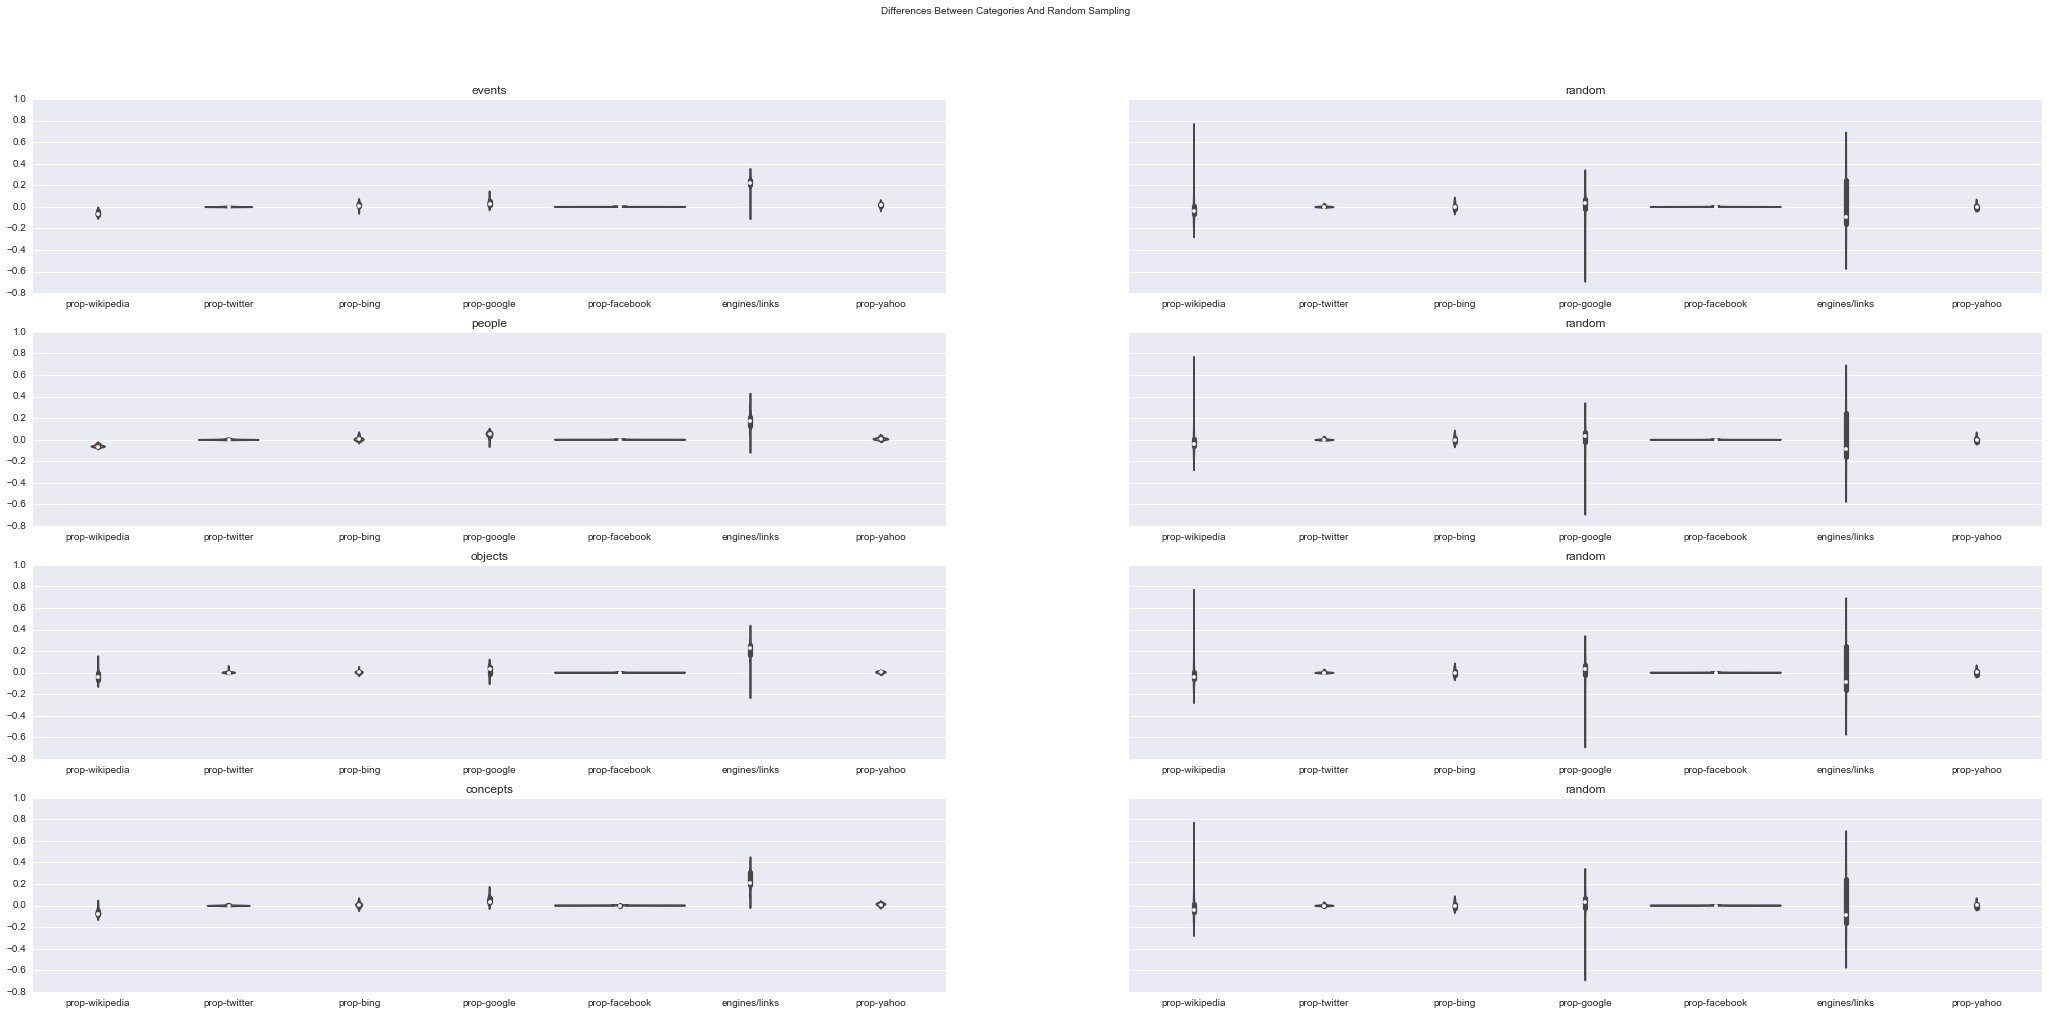

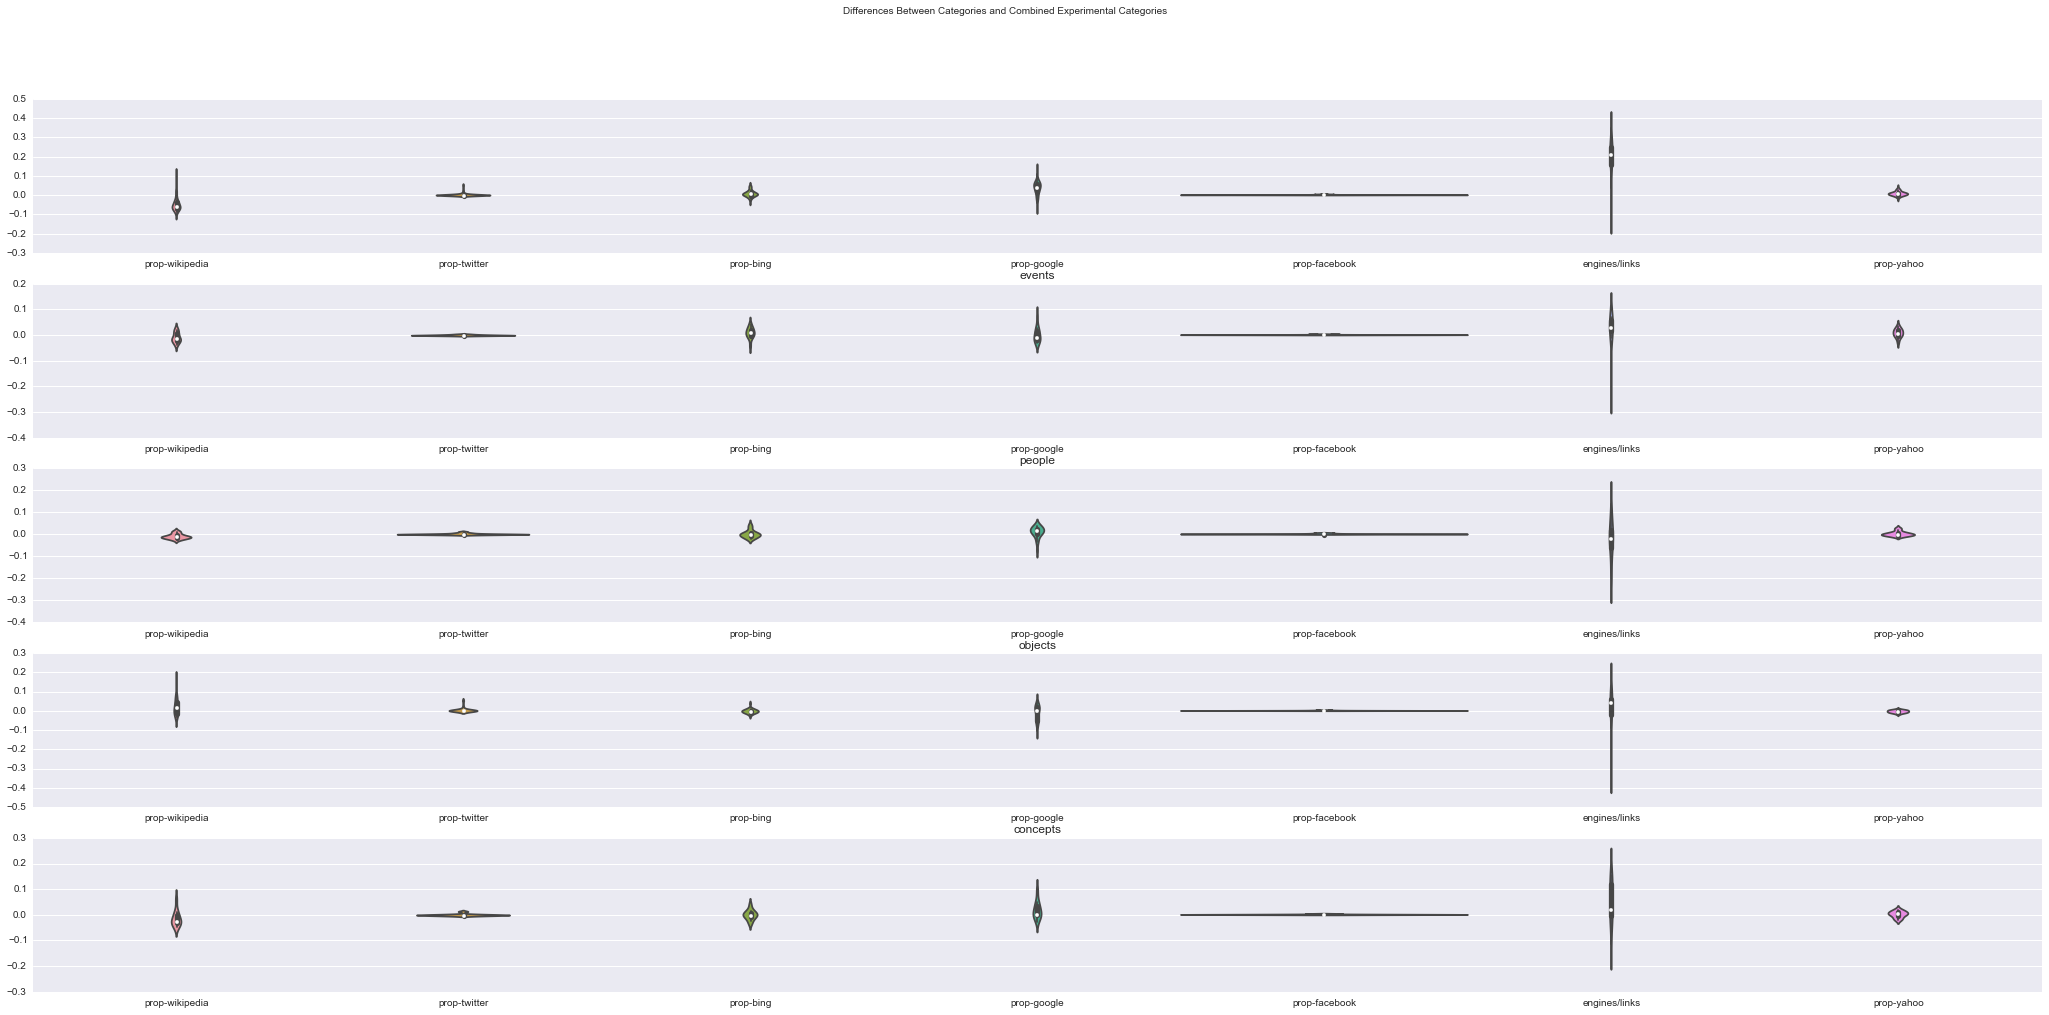

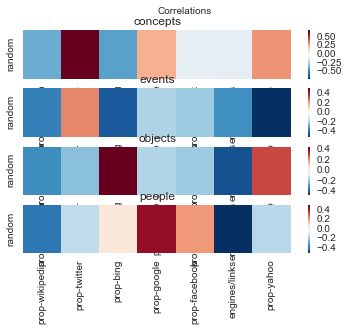

In [11]:
nountype_problem.discovery()

Another source of bias is the possibility that the sampling of non-random categories is skewed towards the high-view pages, and it is possible that that bias weakens the suggestion that the previous findings are related to their hypothesis.

In [3]:
ms_problem.popularityOf()
nountype_problem.popularityOf()
clickbait_problem.popularityOf()
hierarchical_problem.popularityOf()

NameError: name 'ms_problem' is not defined

In [12]:
import instances.popularity
popularity_q_problem = WikiProblem(instances.popularity.quantile_inst)
popularity_even_problem =  WikiProblem(instances.popularity.even_inst)

ValueError: too many values to unpack (expected 2)

In [ ]:
popularity_q_problem.discovery()

In [ ]:
popularity_even_problem.discovery()

Maybe the proportion of wikipedia traffic and the proportion of engines/links cluster together, because they are both 'within the wikipedia site'. Maybe that applies to the concept of stuff people research versus stuff people quickly search for and then leave.

In [ ]:
# A Tool for finding the exact wikipedia names corresponding to phrases.
candidate_phrases = ['tupac','David Foster Wallace', 'paternalism']
for phrase in candidate_phrases:
    most_like(phrase)

In [3]:
sns.violinplot??

In [2]:
import seaborn as sns

In [14]:
sns.FacetGrid??

In [16]:
sns.ClusterGrid??

In [17]:
sns.distplot??

In [9]:
for item in ms_problem.experimental['microsoft'].iteritems():
    print(item)

('prop-yahoo', Microsoft_Developer_Network    0.009356
Microsoft_Silverlight          0.036204
Microsoft                      0.017748
Microsoft_Visual_Studio        0.012664
Microsoft_Surface              0.013885
Xbox                           0.017871
OneDrive                       0.070741
Windows_8                      0.011336
Microsoft_Excel                0.024633
Microsoft_Windows              0.018437
Outlook.com                    0.193575
Windows_Media_Player           0.023670
Windows_XP                     0.022778
Windows_NT                     0.014146
Windows_Live                   0.036986
Windows_95                     0.019042
Microsoft_Outlook              0.026944
Kinect                         0.011134
MS-DOS                         0.019940
Microsoft_Office               0.019053
Xbox_360                       0.017870
Windows_Vista                  0.030083
Windows_API                    0.012209
Microsoft_PowerPoint           0.031567
Microsoft_TechNet        

In [13]:
for item in ms_problem.control['technical'].iterrows():
    print(item[1])

prop-yahoo       NaN
prop-facebook    NaN
prop-google      NaN
prop-twitter     NaN
prop-bing        NaN
prop-wikipedia   NaN
engines/links    NaN
Name: Albert_II,_Margrave_of_Meissen, dtype: float64
prop-yahoo       NaN
prop-facebook    NaN
prop-google      NaN
prop-twitter     NaN
prop-bing        NaN
prop-wikipedia   NaN
engines/links    NaN
Name: Apple, dtype: float64
prop-yahoo       NaN
prop-facebook    NaN
prop-google      NaN
prop-twitter     NaN
prop-bing        NaN
prop-wikipedia   NaN
engines/links    NaN
Name: Art_colony, dtype: float64
prop-yahoo       NaN
prop-facebook    NaN
prop-google      NaN
prop-twitter     NaN
prop-bing        NaN
prop-wikipedia   NaN
engines/links    NaN
Name: Atelier, dtype: float64
prop-yahoo       NaN
prop-facebook    NaN
prop-google      NaN
prop-twitter     NaN
prop-bing        NaN
prop-wikipedia   NaN
engines/links    NaN
Name: Azad_Hind, dtype: float64
prop-yahoo       NaN
prop-facebook    NaN
prop-google      NaN
prop-twitter     NaN
prop-